# Heart Disease Prediction


Machine Learning techniques have been used in multiple fields globally now. They also play a vital role in terms of medical and health services. Appropriate algorithms of ML can be selected to predict tendency or possibilities of particular diseases. What medical specilists can do is that adjusting evaluations or treatments based on those predications generally.<br>

This case analysis is based on the dataset of Heart Disease Predication from UCI (https://archive.ics.uci.edu/ml/datasets/heart+Disease) and Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci)to predict potential heart diseases by Machine Learning techniques, includes Support Vector Machine, Randome Forest and Deep Learning.<br>

## Dataset Information
 **Purpose:** This analysis is set for purposes of ...<br>
 **Dataset:** Heart Diseases Prediction <br>
 **Data Size:** ***303 rows*** and ***14 attributes*** <br>
 **Algorithms selected:** KNN; SVM; Decision Tree; Random Forest; Logistic Regression; Grid; TensorFlow 
 
## Pythonic dictionary
**age:** age of patients at admission - the most important risk factor in developing CVS<br>
**sex:** gender of patients ***1 for male and 0 for female***<br>
**cp:** Chest Pain (Angina) types ***1: typical; 2: atypical; 3: non-anginal; 4: asymptomatic***<br> 
**trestbps:** Resting blood pressure ***(mmHg)***<br>
**chol:** Serum Cholesterol level ***(mg/dl)***<br>
**fbs:** Fasting blood sugar level ***(>120 mf/dl, 1 = true; 0 = false)***<br>
**restecg:** Resting ECG ***(0: normal; 1: having ST-T wave abnormality; 2: showing probable or definite left ventricular hypertrophy by Estes'criteria)***<br>
**thalach:** Max heart rate achieved<br>
**exang:** Exercise induced angina ***(1: yes; 0:no)***<br>
**oldpeck:** Peak exercise ST segment<br>
**slope:** Slope of the peak exercise ST segment ***(1: upsloping, 2: flat; 3: downsloping)***<br>
**ca:** Number of major vessels ***(0~3)*** <br>
**thal:** A blood disorder called 'thalassemia' ***(3: normal; 6: fixed defect; 7: reversable defect)***<br>
**target:** Diagnosis of Heart Disease ***(0: no; 1: yes)***<br>

## Case Outline
**Part 1 - Data Acquisition**<br>
**Part 2 - Exploratory Data Analysis**<br>
**Part 3 - Machine Learning algorithms**<br>
**Part 4 - Conclusion and Summary**<br>

## Part 1 - Data Acquisition

### Import libraries and Import Data

In [12]:
# Import libraries
# Regular libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

# Import sklearn libraries for ML analysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Import tensorflow for Neural Networks
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout

print(os.listdir("/home/elliottsao/Downloads/"))
np.random.seed(10)

['jep.25.1.209.pdf', 'document.blg', 'Lab_5b_Exp_Designs_&_Hypothesis_Testing.pdf', 'test2.tex', 'mysql-apt-config_0.8.14-1_all.deb', 'titanic_train.csv', 'titanic3.xls', 'document.synctex.gz', 'lec3H.pdf', 'Presenting Skills.pptx', 'rsc_article_template.zip', 'document.tex', 'vim_cheat_sheet_for_programmers_screen.png', '.~lock.Module 10.pptx#', 'document.pdf', 'titanic.csv', 'heart.csv', 'tests_of_significance_notes.pdf', 'vimtutor.pdf', 'Employee-attrition.csv', 'Heart Disease Prediction.ipynb', 'dropbox_2019.02.14_amd64.deb', 'Module 10.pptx', 'SJU3VW_2019_12_05_10_54_5ebf8d28-61fc-45f1-a51e-b44e44b52f09.pdf', 'document.aux', 'Final Project - Heart Diseases Prediction.ipynb', 'document.log', 'kiminonawa.jpg', 'Module 1 Part 1 - 1.2.pptx', 'Apache_OpenOffice_4.1.7_Linux_x86-64_install-rpm_en-US.tar.gz', 'nr7397oo0spr4r66o9nr50qn9p35846r.jpg', '.Rhistory', 'rsc-articletemplate.tex', 'Anaconda3-2019.07-Linux-x86_64.sh', 'rstudio-1.2.5019-amd64.deb', 'Module 10.pdf', 'document.bbl', 't

In [13]:
# Import dataset heart disease (hd)

hd = pd.read_csv('/home/elliottsao/Downloads/heart.csv')

In [14]:
# Check data information, missing values and dtype
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


By this stage, dataset has been read successfully. There are **303 rows** and no missing values. **13 features** and the **14th is the target value** that we expect to find something. <br> **EDA part starts soon.**

In [15]:
hd.loc[hd.sex == 1, 'sex'] = 'male'
hd.loc[hd['sex'] == 0, 'sex'] = 'female'

hd.loc[hd['cp'] == 1, 'cp'] = 'typical'
hd.loc[hd['cp'] == 2, 'cp'] = 'atypical'
hd.loc[hd['cp'] == 3, 'cp'] = 'no_pain'
hd.loc[hd['cp'] == 4, 'cp'] = 'no_feel'

hd.loc[hd['fbs'] == 1, 'fbs'] = 'higher than 120 mg/dl'
hd.loc[hd['fbs'] == 0, 'fbs'] = 'lower than 120 mg/dl'

hd.loc[hd['restecg'] == 0, 'restecg'] = 'normal'
hd.loc[hd['restecg'] == 1, 'restecg'] = 'ST-T wave abnormality'
hd.loc[hd['restecg'] == 2, 'restecg'] = 'left ventricular hypertrophy'

hd.loc[hd['exang'] == 1, 'exang'] = 'true'
hd.loc[hd['exang'] == 0, 'exang'] = 'false'

hd.loc[hd['slope'] == 1, 'slope'] = 'up'
hd.loc[hd['slope'] == 2, 'slope'] = 'flat'
hd.loc[hd['slope'] == 3, 'slope'] = 'down'

hd.loc[hd['thal'] == 1, 'thal'] = 'normal'
hd.loc[hd['thal'] == 2, 'thal'] = 'fixed defect'
hd.loc[hd['thal'] == 3, 'thal'] = 'reversable defect'

In [16]:
hd.describe(include=[np.object])

,sex,cp,fbs,restecg,exang,slope,thal
count,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,4
top,male,0,lower than 120 mg/dl,ST-T wave abnormality,false,flat,fixed defect
freq,207,143,258,152,204,142,166


In [17]:
hd['thal'] = hd['thal'].astype('object')

## Part 2 - Exploratory Data Analysis (EDA)

In [18]:
# Check first 5 rows (default)
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,no_pain,145,233,higher than 120 mg/dl,normal,150,false,2.3,0,0,normal,1
1,37,male,atypical,130,250,lower than 120 mg/dl,ST-T wave abnormality,187,false,3.5,0,0,fixed defect,1
2,41,female,typical,130,204,lower than 120 mg/dl,normal,172,false,1.4,flat,0,fixed defect,1
3,56,male,typical,120,236,lower than 120 mg/dl,ST-T wave abnormality,178,false,0.8,flat,0,fixed defect,1
4,57,female,0,120,354,lower than 120 mg/dl,ST-T wave abnormality,163,true,0.6,flat,0,fixed defect,1


In [19]:
# Check data description
hd.describe()

,age,trestbps,chol,thalach,oldpeak,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000,1.000000


**Summary:** We can see the scale of each feature is different and quite varied.<br> The youngest is 29 and oldest is 77; Serum cholesterol level is from 126 to 564 with a standard deviation of 51.83.

### Understanding the data

In [20]:
# Check Relations

hd.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Text(0.5, 0, 'dianosed rate')

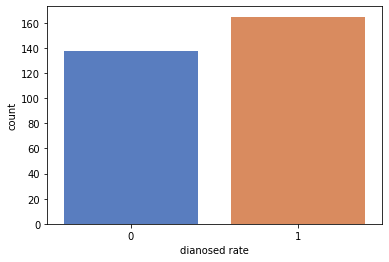

In [21]:
# Check diagnosed rate
sns.countplot(x = 'target', data = hd, palette = "muted")
plt.xlabel("dianosed rate")

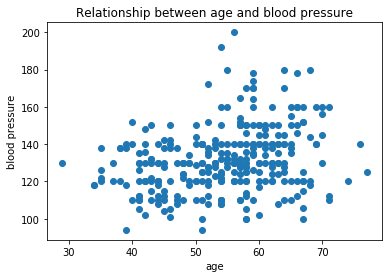

In [22]:
plt.xlabel("age")
plt.ylabel("blood pressure")
 
# define title
plt.title("Relationship between age and blood pressure")
 
# plot
plt.scatter(hd['age'], hd['trestbps'])
plt.show()

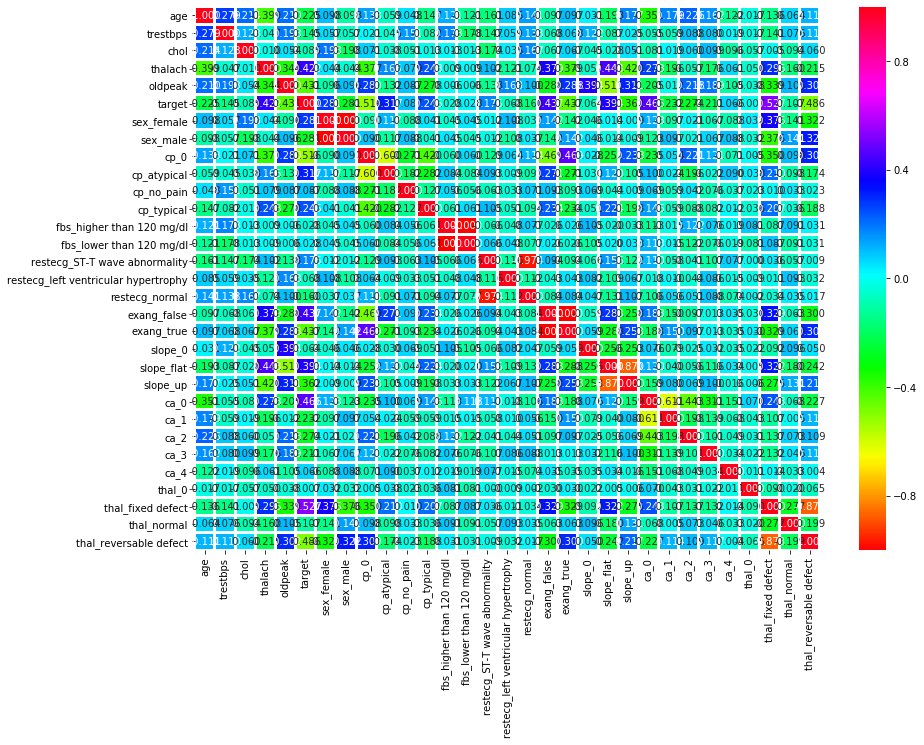

In [79]:
# Plot heatmap

plt.figure(figsize=(14,10))
sns.heatmap(hd.corr(),annot=True,cmap='hsv',fmt=' .3f', linewidths=2)
plt.show()

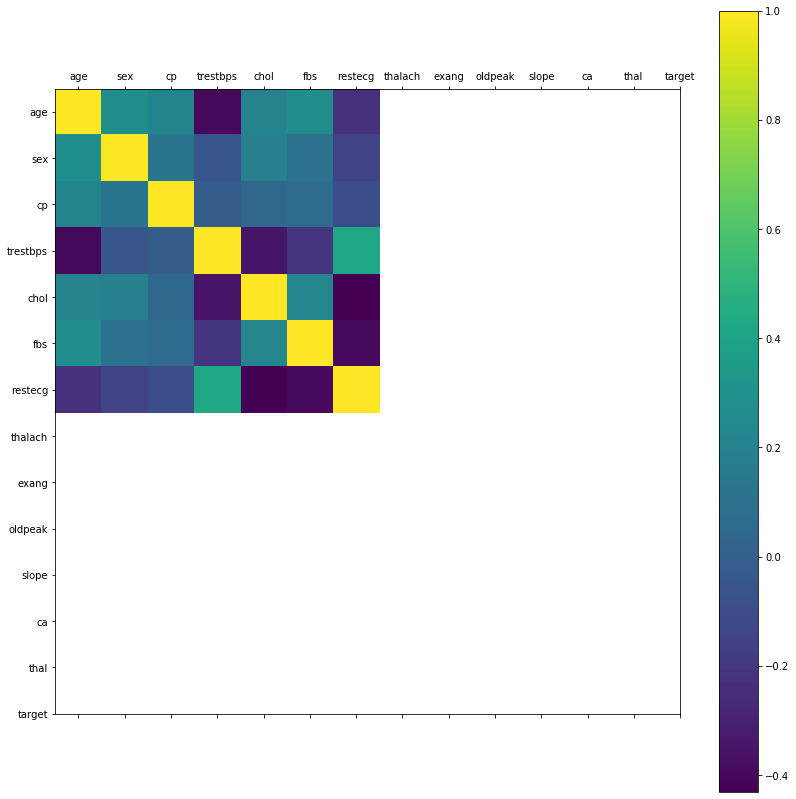

In [24]:
# Visualise data

rcParams['figure.figsize'] = 20, 14
plt.matshow(hd.corr())
plt.yticks(np.arange(hd.shape[1]), hd.columns)
plt.xticks(np.arange(hd.shape[1]), hd.columns)
plt.colorbar()

In [25]:
corr = hd.corr()
hd.corr()

,age,trestbps,chol,thalach,oldpeak,ca,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,0.276326,-0.225439
trestbps,0.279351,1.000000,0.123174,-0.046698,0.193216,0.101389,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,0.070511,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,-0.213177,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,0.222682,-0.430696
ca,0.276326,0.101389,0.070511,-0.213177,0.222682,1.000000,-0.391724
target,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,-0.391724,1.000000


In [26]:
# Plot cmap

cmap = sns.diverging_palette(250, 10, n=3, as_cmap=True)
 
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]
 
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())


,age,trestbps,chol,thalach,oldpeak,ca,target
age,1,0.28,0.21,-0.4,0.21,0.28,-0.23
trestbps,0.28,1,0.12,-0.047,0.19,0.1,-0.14
chol,0.21,0.12,1,-0.0099,0.054,0.071,-0.085
thalach,-0.4,-0.047,-0.0099,1,-0.34,-0.21,0.42
oldpeak,0.21,0.19,0.054,-0.34,1,0.22,-0.43
ca,0.28,0.1,0.071,-0.21,0.22,1,-0.39
target,-0.23,-0.14,-0.085,0.42,-0.43,-0.39,1


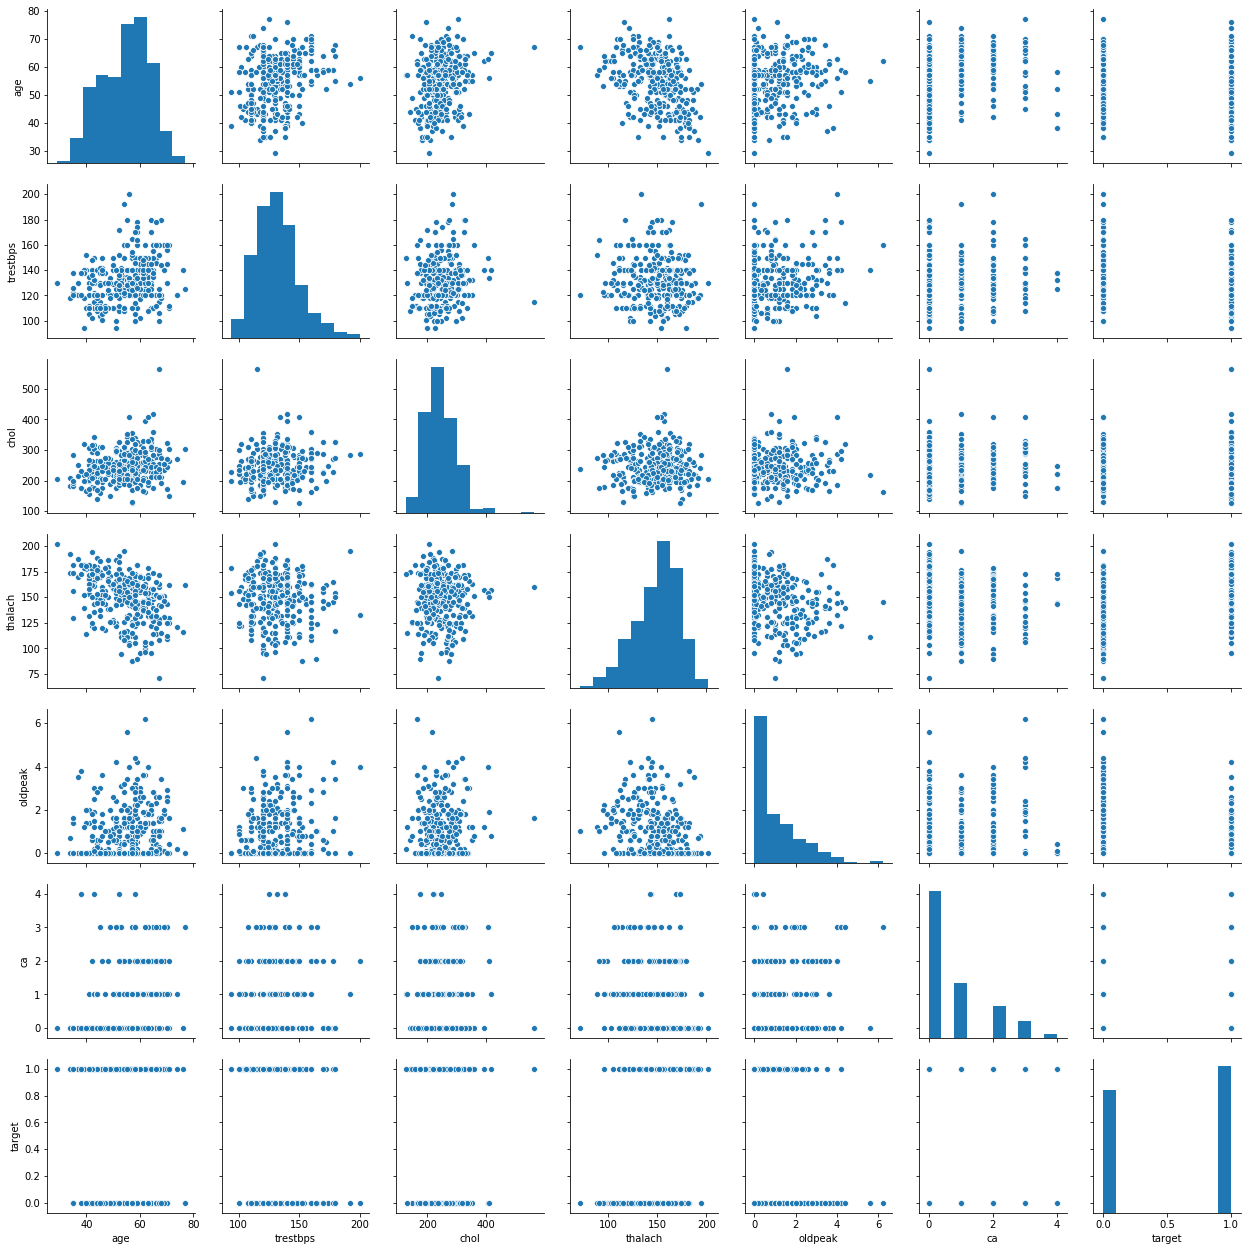

In [27]:
# Plot Pairplot
sns.pairplot(data=hd)

Text(0.5, 1.0, 'Count of each Target Class')

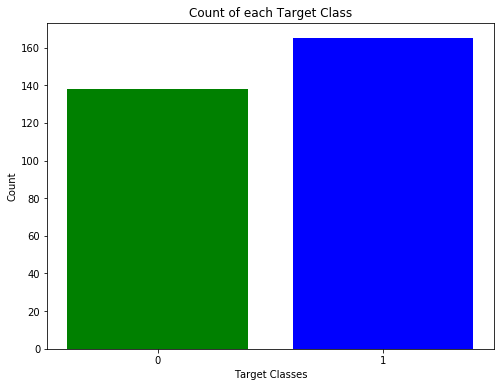

In [28]:
rcParams['figure.figsize'] = 8, 6
plt.bar(hd['target'].unique(), hd['target'].value_counts(), color = ['blue', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [29]:
# Groupby cp
hd.groupby('cp', as_index=False)['target'].mean()

,cp,target
0,0,0.272727
1,atypical,0.793103
2,no_pain,0.695652
3,typical,0.820000


In [30]:
# Group by slope
hd.groupby('slope', as_index=False)['target'].mean()

,slope,target
0,0,0.428571
1,flat,0.753521
2,up,0.350000


In [31]:
# Group by thal
hd.groupby('thal', as_index=False)['target'].mean()

,thal,target
0,0,0.500000
1,fixed defect,0.783133
2,normal,0.333333
3,reversable defect,0.239316


In [32]:
# Group by target
hd.groupby('target').mean()

,age,trestbps,chol,thalach,oldpeak,ca
target,,,,,,
0,56.601449,134.398551,251.086957,139.101449,1.585507,1.166667
1,52.496970,129.303030,242.230303,158.466667,0.583030,0.363636


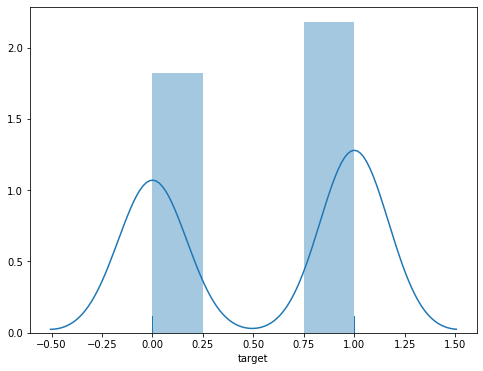

In [33]:
sns.distplot(hd['target'],rug=True)
plt.show()

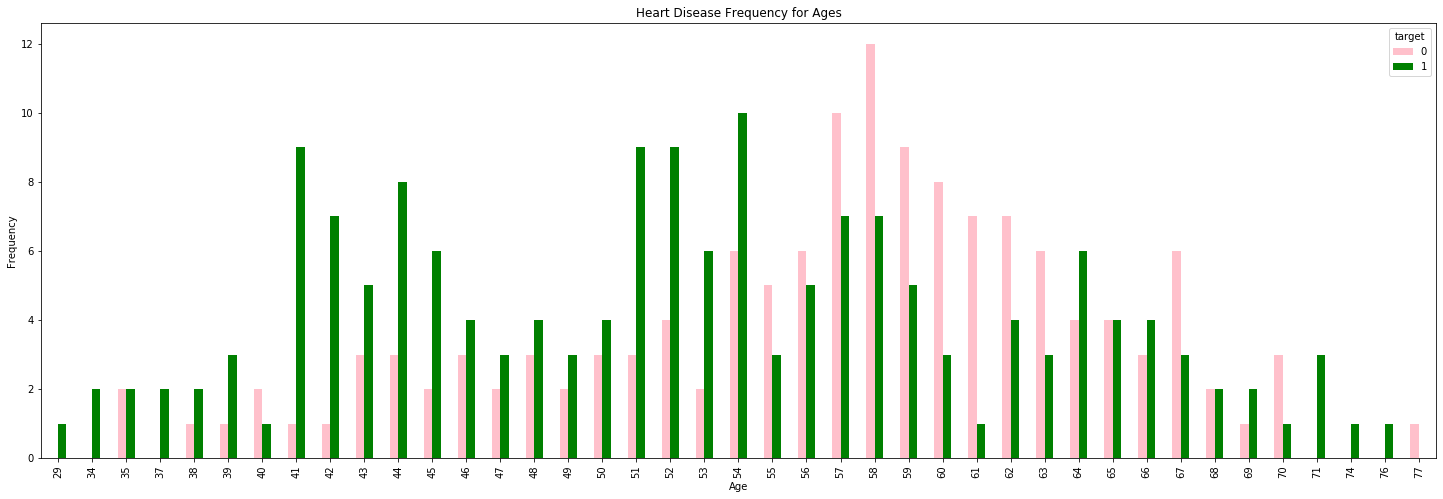

In [34]:
# Find Heart Disease Frequency for Ages

pd.crosstab(hd.age,hd.target).plot(kind="bar",figsize=(25,8),color=['pink','green'])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

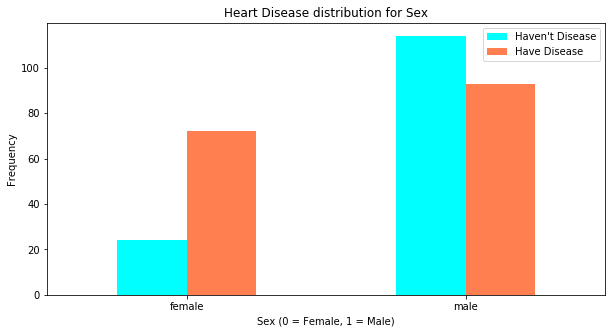

In [35]:
# Find Heart Disease distribution for Sex

pd.crosstab(hd.sex,hd.target).plot(kind="bar",figsize=(10,5),color=['cyan','coral'])
plt.title('Heart Disease distribution for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Relation of tresbps with target, fontsize = 10')

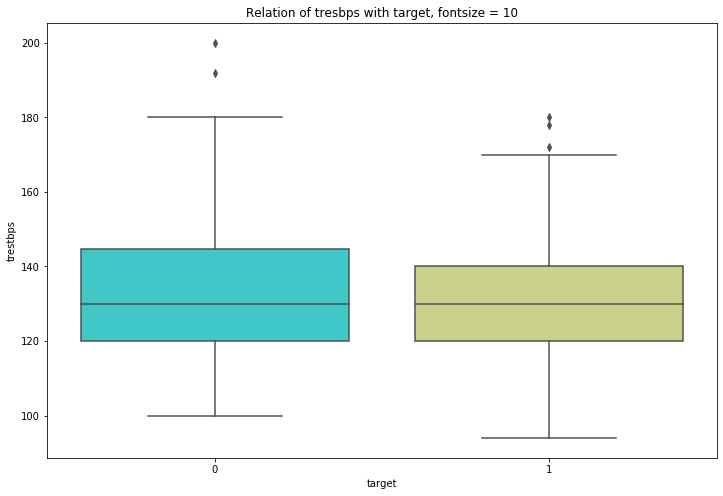

In [36]:
# Relation of tresbps with target

plt.figure(figsize=(12,8))
sns.boxplot(hd['target'], hd['trestbps'], palette = 'rainbow')
plt.title('Relation of tresbps with target, fontsize = 10')

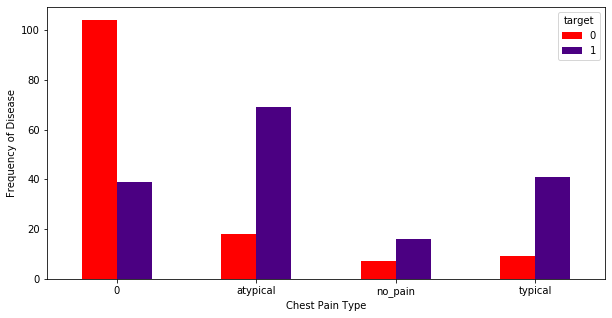

In [37]:
# Chest pain type with Heart Disease 

pd.crosstab(hd.cp,hd.target).plot(kind="bar",figsize=(10,5), color=['red','indigo'])
plt.xlabel('Chest Pain Type')
plt.xticks(rotation=0)
plt.ylabel('Frequency of Disease')
plt.show()

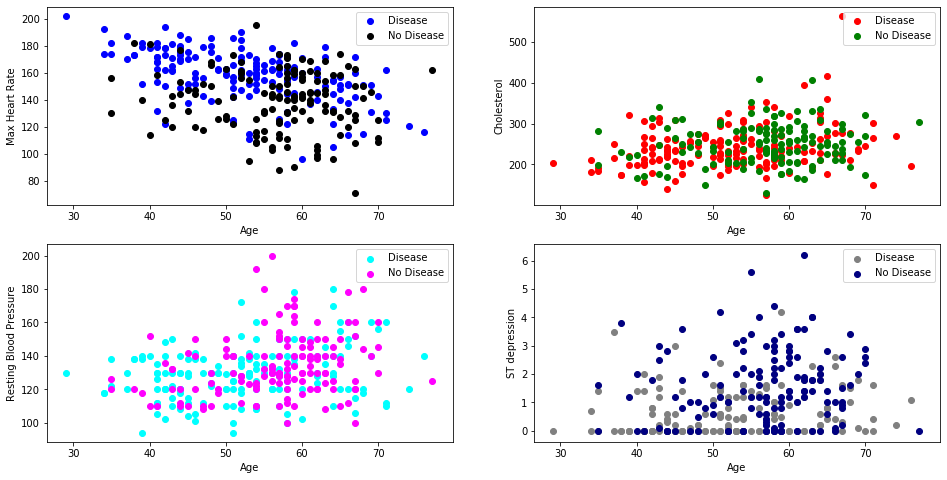

In [38]:
# Effect of parameters on Heart Disease based on Age

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.scatter(x=hd.age[hd.target==1],y=hd.thalach[hd.target==1],c='blue')
plt.scatter(x=hd.age[hd.target==0],y=hd.thalach[hd.target==0],c='black')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,2)
plt.scatter(x=hd.age[hd.target==1],y=hd.chol[hd.target==1],c='red')
plt.scatter(x=hd.age[hd.target==0],y=hd.chol[hd.target==0],c='green')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,3)
plt.scatter(x=hd.age[hd.target==1],y=hd.trestbps[hd.target==1],c='cyan')
plt.scatter(x=hd.age[hd.target==0],y=hd.trestbps[hd.target==0],c='fuchsia')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,4)
plt.scatter(x=hd.age[hd.target==1],y=hd.oldpeak[hd.target==1],c='grey')
plt.scatter(x=hd.age[hd.target==0],y=hd.oldpeak[hd.target==0],c='navy')
plt.xlabel('Age')
plt.ylabel('ST depression')
plt.legend(['Disease','No Disease'])
plt.show()

### Data Processing <br>

Some categorical variables need to be converted into dummy variables and scale all values in order to prepare for Machine Learning part following.

In [39]:
hd = pd.get_dummies(hd, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [40]:
standardScaler = StandardScaler()
columns_to_scale =['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
hd[columns_to_scale] = standardScaler.fit_transform(hd[columns_to_scale])

## Part 3 - Machine Learning algorithms

By using train_test_split, I set test size is 0.20 for rule of thumb '80/20'.

In [41]:
y = hd['target']
X = hd.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### KNN

In [42]:
knn_scores = []
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append((round(np.mean(knn_classifier.score(X_test, y_test)),3)))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

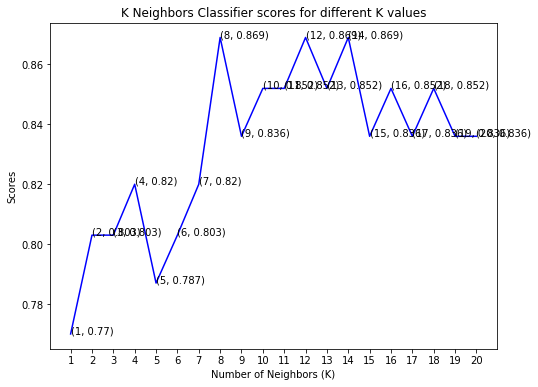

In [43]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'blue')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [44]:
print("The score for K Neighbors Classifier is {}% with {} neighbors.".format(knn_scores[7]*100,8))

The score for K Neighbors Classifier is 86.9% with 8 neighbors.


### Support Vector Machine Classifier

In [45]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append((round(np.mean(svc_classifier.score(X_test, y_test)),3)))

Text(0.5, 1.0, 'SVC scores for different kernels')

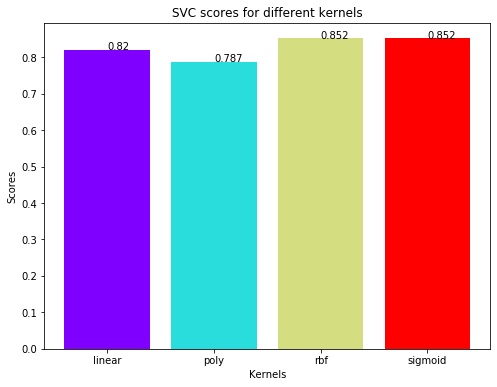

In [46]:
colors = rainbow(np.linspace(0,1,len(kernels)))
plt.bar(kernels, svc_scores,color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('SVC scores for different kernels')

In [47]:
print("The score for SVC is {}% with {} kernel.".format(svc_scores[0]*100,'linear'))

The score for SVC is 82.0% with linear kernel.


### Decision Tree Classifier

In [48]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append((round(np.mean(dt_classifier.score(X_test, y_test)),3)))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

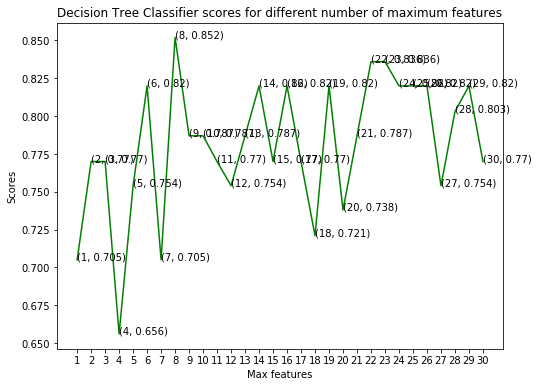

In [49]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [50]:
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_scores[17]*100, [2,4,18]))

The score for Decision Tree Classifier is 72.1% with [2, 4, 18] maximum features.


### Random Forest Classifier

In [51]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append((round(np.mean(rf_classifier.score(X_test, y_test)),3)))

Text(0.5, 1.0, 'Random Forest Classifier scores for differernt number of estimators')

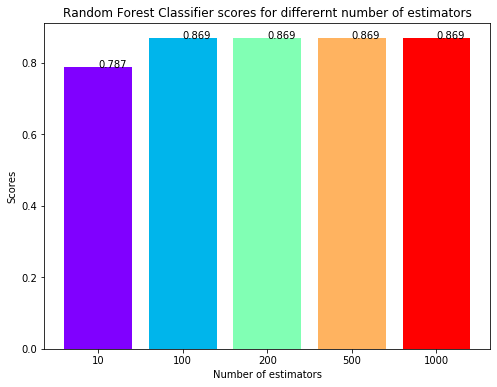

In [52]:
colors = rainbow(np.linspace(0,1,len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for differernt number of estimators')

### Logistic Regression

In [53]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
log_reg.score(X_train, y_train)

0.859504132231405

In [55]:
log_reg.score(X_test, y_test)

0.8852459016393442

In [56]:
# Accuracy Score
y_predict_log = log_reg.predict(X_test)
accuracy_score(y_test, y_predict_log)

0.8852459016393442

### Grid section

In [57]:
# Grid section

param_grid = [
    {
        'C':[0.01,0.1,1,10,100],
        'penalty':['l2','l1'],
        'class_weight':['balanced',None]
    }
]

In [58]:
grid_search = GridSearchCV(log_reg,param_grid,cv=10,n_jobs=-1)

In [59]:
%%time
grid_search.fit(X_train, y_train)

CPU times: user 505 ms, sys: 84.7 ms, total: 590 ms
Wall time: 1.95 s


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100],
                          'class_weight': ['balanced', None],
                          'penalty': ['l2', 'l1']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [60]:
grid_search.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
grid_search.best_score_

0.8471074380165289

In [62]:
grid_search.best_params_

{'C': 1, 'class_weight': None, 'penalty': 'l2'}

In [63]:
log_reg = grid_search.best_estimator_
log_reg.score(X_train, y_train)

0.859504132231405

In [64]:
log_reg.score(X_test,y_test)

0.8852459016393442

In [65]:
#F1 score
f1_score(y_test,y_predict_log)

0.8985507246376812

In [66]:
print(classification_report(y_test,y_predict_log))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [67]:
# PLot  Confusion Max

cnf_matrix = confusion_matrix(y_test,y_predict_log)
cnf_matrix

array([[23,  4],
       [ 3, 31]])

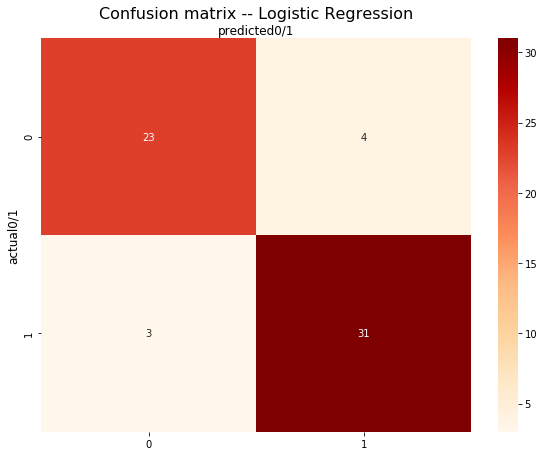

In [68]:
def plot_cnf_matirx(cnf_matrix,description):
    class_names = [0,1]
    fig,ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks,class_names)
    plt.yticks(tick_marks,class_names)

#create a heat map
    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'OrRd',
               fmt = 'g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title(description, y = 1.1,fontsize=16)
    plt.ylabel('actual0/1',fontsize=12)
    plt.xlabel('predicted0/1',fontsize=12)
    plt.show()
    
plot_cnf_matirx(cnf_matrix,'Confusion matrix -- Logistic Regression')

In [69]:
decision_scores = log_reg.decision_function(X_test)
precisions,recalls,thresholds = precision_recall_curve(y_test,decision_scores)

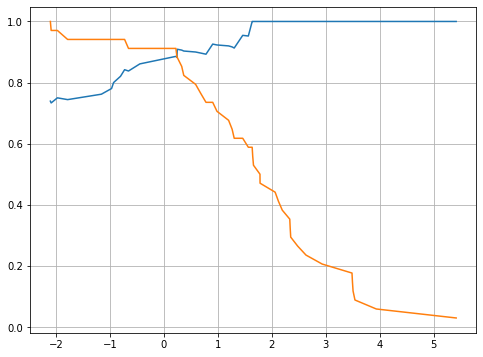

In [70]:
plt.plot(thresholds,precisions[:-1])
plt.plot(thresholds,recalls[:-1])
plt.grid()
plt.show()

In [71]:
# Plot ROC
fprs,tprs,thresholds = roc_curve(y_test,decision_scores)

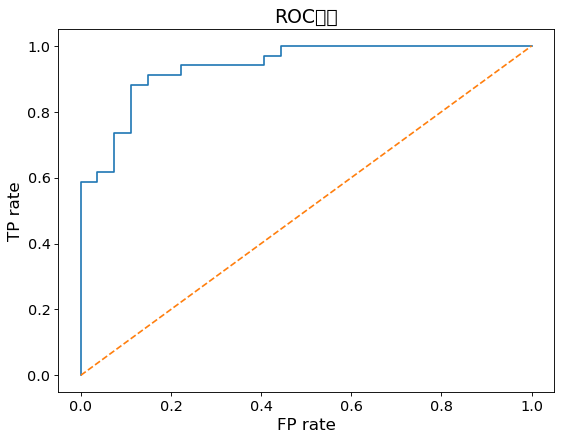

In [72]:
def plot_roc_curve(fprs,tprs):
    plt.figure(figsize=(8,6),dpi=80)
    plt.plot(fprs,tprs)
    plt.plot([0,1],linestyle='--')
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.ylabel('TP rate',fontsize=15)
    plt.xlabel('FP rate',fontsize=15)
    plt.title('ROC曲线',fontsize=17)
    plt.show()
    
plot_roc_curve(fprs,tprs)

In [73]:
# ROC score
roc_auc_score(y_test,decision_scores)

0.9379084967320261

## Part 4 - Conclusion and Summary

### Conclusion
Finally, model scores for selected algorithms above are listed as follow:<br>

**KNN:** 86.9% with 8 neighbors (k=8,12,14)<br>
**SVM:** 82.0% with linear kernal; 78.7% with poly kernal; 85.2% with rbf and sigmoid kernals<br>
**DT:** 72.1% with 2,4,8<br>
**RF:** 86.9% after 100 in this model and 78.7% at 10<br>
**LR:** roc-auc is 93.79%<br>
**Grid:** f1 score is 89.855%<br>

### Summary
This model analysis is based on a Heart disease dataset from a Swiss Cleveland Clinic Foundation.<br> Through this project from design to final result. It really helped me to understand on how to apply machine learning techniques into a medical detection and prediction so that can help medical staff to reduce time comsuption and optimise accuracy of medical prediction for further research.